In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

1. Baza danych dotycząca śmiertelnych interwencji policji w USA została wczytana do obiektu "df_deaths"

In [2]:
df_deaths = pd.read_csv('fatal-police-shootings-data.csv')
df_deaths

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,5921,William Slyter,2020-06-13,shot,gun,22.0,M,W,Kansas City,MO,False,other,Other,False
5412,5922,TK TK,2020-06-13,shot,undetermined,NaN,M,NaN,San Bernardino,CA,False,attack,Not fleeing,False
5413,5924,Nicholas Hirsh,2020-06-15,shot,gun,31.0,M,W,Lawrence,KS,False,attack,Car,False
5414,5926,TK TK,2020-06-16,shot,gun,24.0,M,NaN,Beach Park,IL,False,attack,Not fleeing,False


2. Tabela została przekształcona w taki sposób że wskazuje jednocześnie zestwienie liczby ofiar wedłóg rasy oraz oznak choroby psychicznej.

In [3]:
df_transform = df_deaths.pivot_table(values='id',index='race',columns='signs_of_mental_illness', aggfunc=len)
df_transform

signs_of_mental_illness,False,True
race,,
A,69,24
B,1114,184
H,745,157
N,64,14
O,37,11
W,1763,713


3. Do zestawienia dodana została kolumna wskazująca odsetek ofiar interwencji wykazujący oznaki choroby psychicznej dla każdej z ras. Najwyższy odsetek znamion choroby odnotowano u przedstawicieli rasy białej.

In [4]:
df_transform["sign_rate"] = df_transform.apply(lambda row: ((row[1]/row[0])*100),axis=1)
df_transform

signs_of_mental_illness,False,True,sign_rate
race,,,
A,69,24,34.782609
B,1114,184,16.517056
H,745,157,21.073826
N,64,14,21.875000
O,37,11,29.729730
W,1763,713,40.442428


4. Dodano kolumnę oznaczającą dzień tygodnia w którym doszło do interwencji. Zamieszczono także wykres kolumnowy przedstawiający liczbe śmiertelnych interwencji do których doszło w poszczególne dni tygodnia.

<AxesSubplot:xlabel='day'>

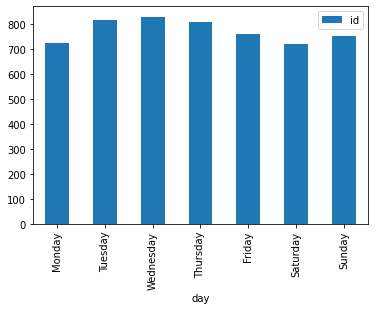

In [5]:
df_deaths['date'] = pd.to_datetime(df_deaths['date'])
df_deaths["day"] = df_deaths['date'].dt.day_name()
df_days=df_deaths.groupby(pd.Grouper(key='day')).agg({'id':'count'})
last_days = df_days[0:3]
first_days = df_days[3:7]
df_days = pd.concat([first_days, last_days])
df_days.plot.bar()

5. Przeliczono do ilu incydentów z bazy danych na 1000 mieszkańców doszło w każdym ze stanów.

<AxesSubplot:xlabel='State'>

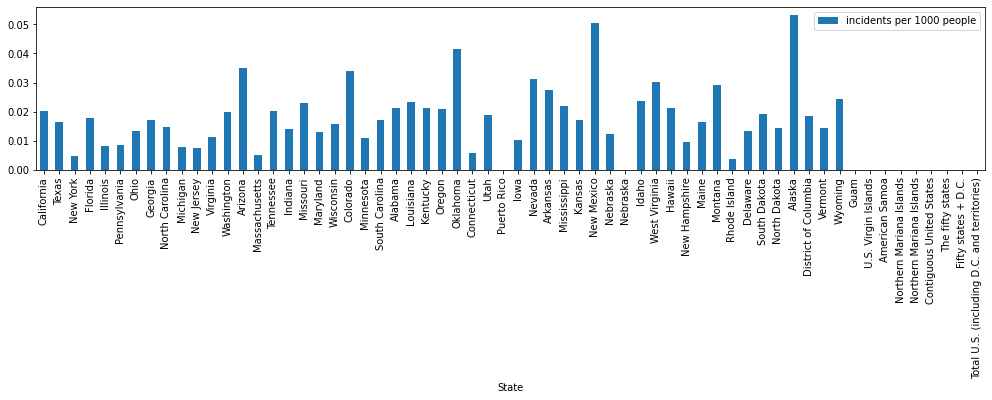

In [30]:
state_ab = pd.read_html("https://en.wikipedia.org/wiki/List_of_U.S._state_and_territory_abbreviations", header=0)
state_pop = pd.read_html("https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population", header=0)
state_ab[0].rename(columns = {list(state_ab[0])[5]: "codes", list(state_ab[0])[0]: "states"}, inplace = True)
state_cleaned_ab = pd.concat([state_ab[0]["states"],state_ab[0]["codes"]], axis=1)
state_cleaned_ab.set_index("states", inplace=True)
state_pop_ab = state_pop[0].join(state_cleaned_ab, on="State")
df_deaths_by_state = df_deaths.groupby(pd.Grouper(key='state')).agg({'id':'count'})
state_pop_deaths = state_pop_ab.join(df_deaths_by_state, on="codes")
state_pop_deaths["incidents per 1000 people"] = state_pop_deaths.apply(lambda row: (row["id"]/row["Population estimate, July 1, 2019[2]"])*1000 ,axis=1)
# state_pop_deaths.sample(60)
state_pop_deaths.plot.bar(x="State",y="incidents per 1000 people", figsize=(17,3))